<a href="https://colab.research.google.com/github/Omid-Hassasfar/CHACAL_2024_Quantum_Computing_Basics_with_Qiskit/blob/main/CHACAL2024_QC_Tutorial_2__Abbas_(Omid)_Hassasfar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing all the required packages on Google Colab

In [ ]:
# Install Qiskit:

# Qiskit is an open-source software development kit for working with quantum computers at the level of circuits, pulses, and algorithms
!pip install qiskit[visualization]

# Qiskit Aer is high-performance quantum computing simulators with realistic noise models.
# The Qiskit Aer device noise model automatically generates a simplified noise model for a real device.
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=297abb97681c6e70203af554d5c54f31a77c59e49de09e2c89cc509dc1313c5d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c0

### Importing Qiskit and other necessary packages and libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.circuit import Parameter

### Circuit & Parameter and calculating Expectation values of the Spins for : $B = B_0\mathop x\limits^ \wedge $

In [ ]:
tau = Parameter('τ')
Nt = 75
tau_range = np.linspace(0, 2*np.pi, Nt)

qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'c')
timecirc = QuantumCircuit(qr,cr)

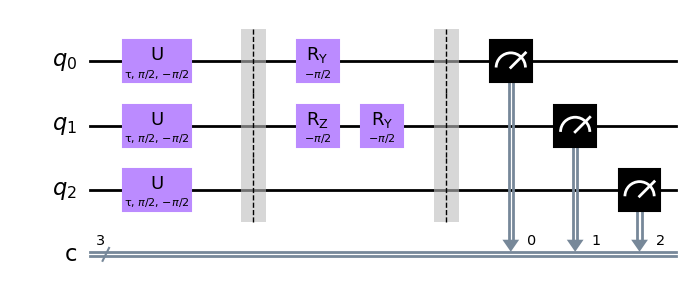

In [ ]:
#no initial unitary transformation since |ψ(0)> = |0>

timecirc.u(tau, np.pi/2,-np.pi/2, qr) #apply exp(-iHt/ħ)
timecirc.barrier(qr)
timecirc.ry(-np.pi/2,0) #rotation to measure <Sx>

timecirc.rz(-np.pi/2,1)
timecirc.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc.barrier(qr)
#no rotation needed to measure <Sz>

timecirc.measure(qr,cr)
timecirc.draw('mpl' , style='clifford')

Next, we define the range for $τ$ and run on the simulator for some number of shots.

In [ ]:
Nshots = 8192

job = execute(timecirc,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

simcounts = job.result().get_counts()

In [ ]:
c000 = np.array(list(map(lambda c: c.get('000', 0), simcounts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), simcounts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), simcounts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), simcounts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), simcounts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), simcounts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), simcounts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), simcounts)))

Sz = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sx = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

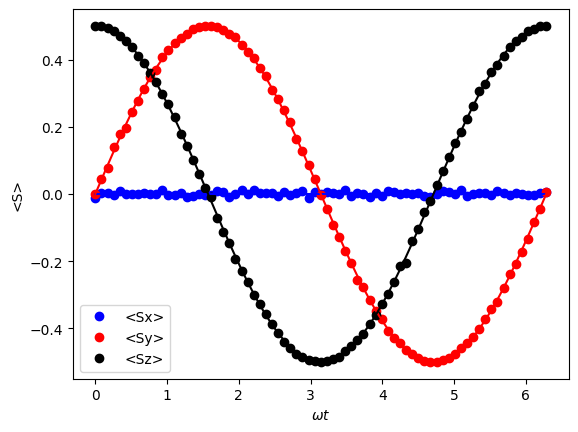

In [ ]:
plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0*np.zeros(Nt),'b-')
plt.plot(tau_range,0.5*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()

### Circuit & Parameter and calculating Expectation values of the Spins for : $B = 1/\sqrt2 (B_0\mathop y\limits^ \wedge + B_0\mathop x\limits^ \wedge) $

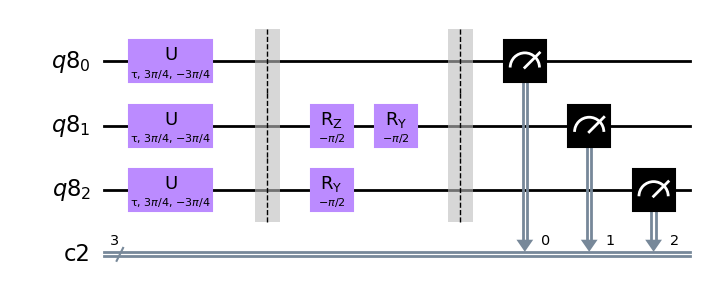

In [ ]:
tau = Parameter('τ')
Nt = 75
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc = QuantumCircuit(qr,cr)

timecirc.u(tau,3*np.pi/4, - 3*np.pi/4, qr)
timecirc.barrier(qr)
timecirc.ry(-np.pi/2,2) #rotation to measure <Sx>

timecirc.rz(-np.pi/2,1)
timecirc.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc.barrier(qr)
#no rotation needed to measure <Sz>

timecirc.measure(qr,cr)
timecirc.draw('mpl' , style='clifford')

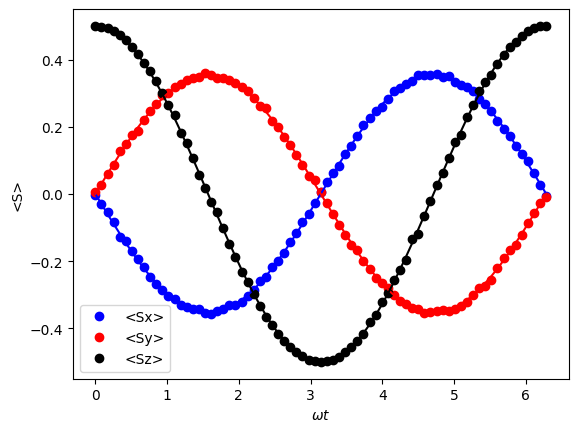

In [ ]:
tau_range = np.linspace(0, 2*np.pi, Nt)
Nshots = 8192

job = execute(timecirc,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

simcounts = job.result().get_counts()

c000 = np.array(list(map(lambda c: c.get('000', 0), simcounts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), simcounts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), simcounts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), simcounts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), simcounts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), simcounts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), simcounts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), simcounts)))

Sx = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sz = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0.5*np.cos(3*np.pi/4)*np.sin(tau_range),'b-')
plt.plot(tau_range,0.5*np.sin(3*np.pi/4)*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()

### Simulating Dynamics using Lie-Trotter decomposition
Below is an example of the Trotterization scheme where the number of Trotter steps is set to ntrot.

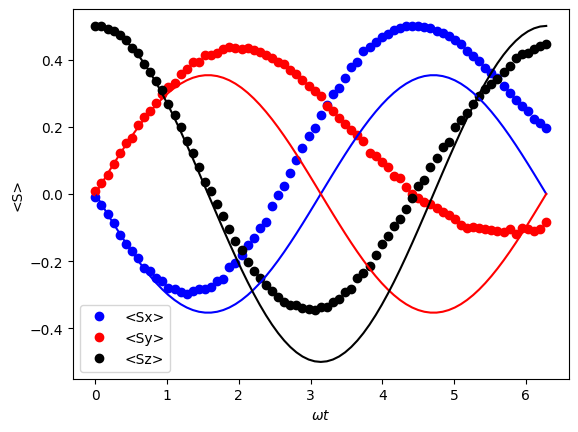

In [ ]:
tau = Parameter('τ')
Nt = 75

tau_range = np.linspace(0, 2*np.pi, Nt)
Nshots = 8192

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc0 = QuantumCircuit(qr,cr)
θ = np.pi/2
ϕ = np.pi/4

#vary this:
ntrot = 2

for i in range(0,ntrot):
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi/2,-np.pi/2,qr)
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi,-np.pi,qr)

timecirc0.barrier(qr)
timecirc0.ry(-np.pi/2,2) #rotation to measure <Sx>

timecirc0.rz(-np.pi/2,1)
timecirc0.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc0.barrier(qr)
#no rotation needed to measure <Sz>

timecirc0.measure(qr,cr)
timecirc0.draw()


job = execute(timecirc0, backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

counts = job.result().get_counts()

c000 = np.array(list(map(lambda c: c.get('000', 0), counts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), counts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), counts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), counts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), counts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), counts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), counts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), counts)))

Sx = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sz = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0.5*np.cos(3*np.pi/4)*np.sin(tau_range),'b-')
plt.plot(tau_range,0.5*np.sin(3*np.pi/4)*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()

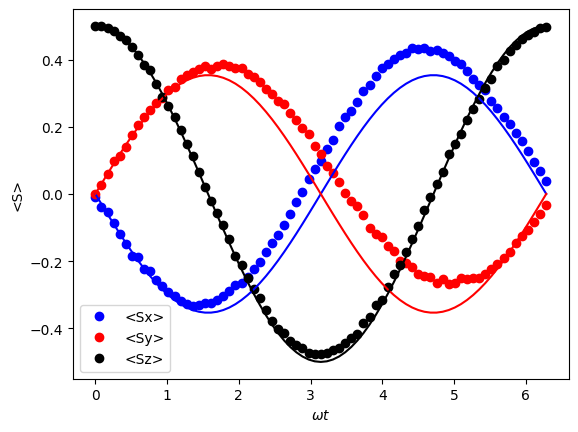

In [ ]:
tau = Parameter('τ')
Nt = 75

tau_range = np.linspace(0, 2*np.pi, Nt)
Nshots = 8192

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc0 = QuantumCircuit(qr,cr)
θ = np.pi/2
ϕ = np.pi/4

#vary this:
ntrot = 5

for i in range(0,ntrot):
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi/2,-np.pi/2,qr)
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi,-np.pi,qr)

timecirc0.barrier(qr)
timecirc0.ry(-np.pi/2,2) #rotation to measure <Sx>

timecirc0.rz(-np.pi/2,1)
timecirc0.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc0.barrier(qr)
#no rotation needed to measure <Sz>

timecirc0.measure(qr,cr)
timecirc0.draw()


job = execute(timecirc0, backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

counts = job.result().get_counts()

c000 = np.array(list(map(lambda c: c.get('000', 0), counts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), counts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), counts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), counts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), counts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), counts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), counts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), counts)))

Sx = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sz = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0.5*np.cos(3*np.pi/4)*np.sin(tau_range),'b-')
plt.plot(tau_range,0.5*np.sin(3*np.pi/4)*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()


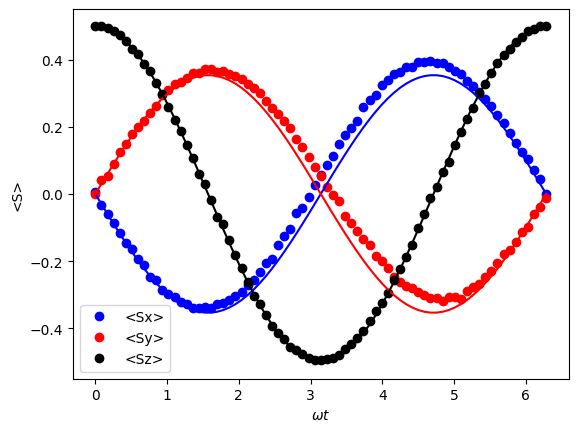

In [ ]:
tau = Parameter('τ')
Nt = 75

tau_range = np.linspace(0, 2*np.pi, Nt)
Nshots = 8192

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc0 = QuantumCircuit(qr,cr)
θ = np.pi/2
ϕ = np.pi/4

#vary this:
ntrot = 10

for i in range(0,ntrot):
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi/2,-np.pi/2,qr)
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi,-np.pi,qr)

timecirc0.barrier(qr)
timecirc0.ry(-np.pi/2,2) #rotation to measure <Sx>

timecirc0.rz(-np.pi/2,1)
timecirc0.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc0.barrier(qr)
#no rotation needed to measure <Sz>

timecirc0.measure(qr,cr)
timecirc0.draw()


job = execute(timecirc0, backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

counts = job.result().get_counts()

c000 = np.array(list(map(lambda c: c.get('000', 0), counts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), counts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), counts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), counts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), counts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), counts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), counts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), counts)))

Sx = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sz = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0.5*np.cos(3*np.pi/4)*np.sin(tau_range),'b-')
plt.plot(tau_range,0.5*np.sin(3*np.pi/4)*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()


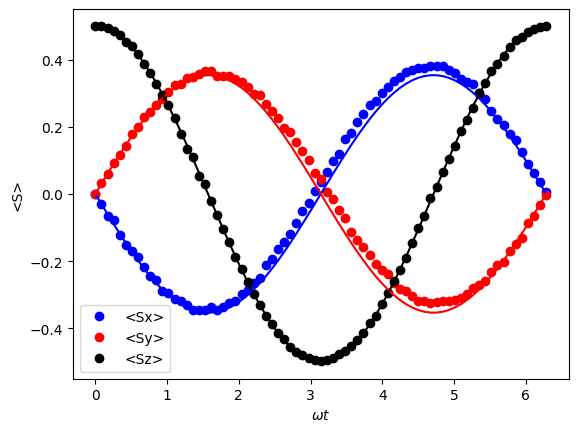

In [ ]:
tau = Parameter('τ')
Nt = 75

tau_range = np.linspace(0, 2*np.pi, Nt)
Nshots = 8192

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc0 = QuantumCircuit(qr,cr)
θ = np.pi/2
ϕ = np.pi/4

#vary this:
ntrot = 15

for i in range(0,ntrot):
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi/2,-np.pi/2,qr)
    timecirc0.u(tau/(np.sqrt(2)*ntrot),np.pi,-np.pi,qr)

timecirc0.barrier(qr)
timecirc0.ry(-np.pi/2,2) #rotation to measure <Sx>

timecirc0.rz(-np.pi/2,1)
timecirc0.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc0.barrier(qr)
#no rotation needed to measure <Sz>

timecirc0.measure(qr,cr)
timecirc0.draw()


job = execute(timecirc0, backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

counts = job.result().get_counts()

c000 = np.array(list(map(lambda c: c.get('000', 0), counts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), counts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), counts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), counts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), counts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), counts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), counts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), counts)))

Sx = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sz = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0.5*np.cos(3*np.pi/4)*np.sin(tau_range),'b-')
plt.plot(tau_range,0.5*np.sin(3*np.pi/4)*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()
